In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from model import *
from preprocessing import *

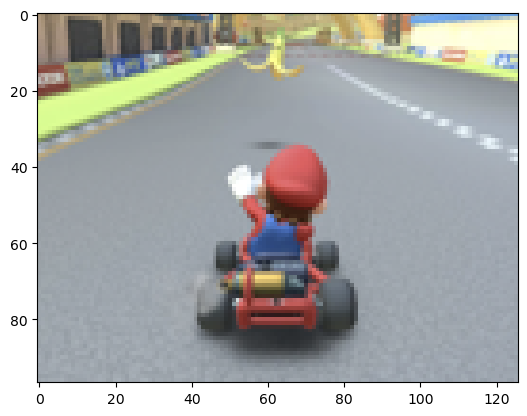

Image info: None | (126, 97) | RGB


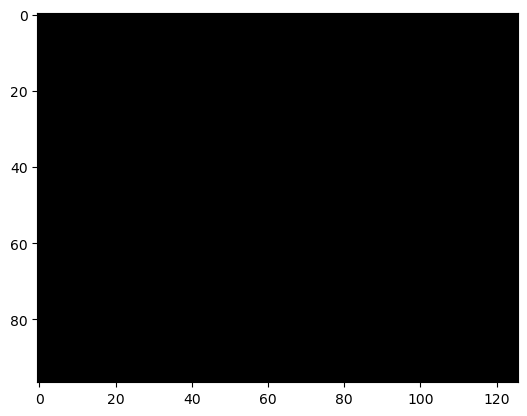

Creating graph...
Merging graph...
Visualizing segmentation and saving into: ../img/banana_vehicule_out.JPG
Number of components: 1
Total running time: 1.214s


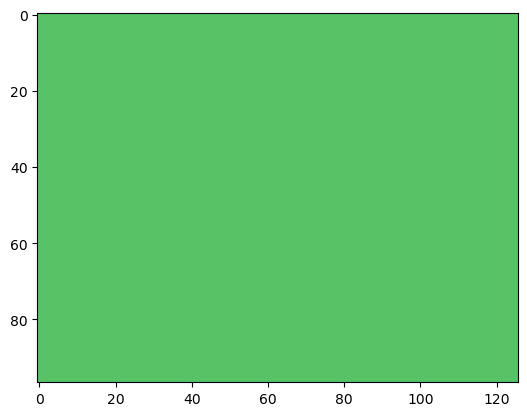

In [75]:
sigma = 3 #3
neighbor = 8
K = 10 #10
min_comp_size = 500
input_file = '../img/banana_vehicule.JPG'
input_file = '../img/mario_input.jpg'
output_file = '../img/banana_vehicule_out.JPG'

original_image = Image.open(input_file).convert("RGB")
fac=10
original_image = original_image.resize((int(original_image.size[0]/fac),int(original_image.size[1]/fac)))

width= original_image.size[1]
height= original_image.size[0]
plt.imshow(original_image)
plt.show()
forest=get_segmented_image(sigma, neighbor, K, min_comp_size, original_image, output_file)


In [71]:
comp_list=[]
for y in range(height):
    for x in range(width):
        comp = forest.find(y * width + x)
        comp_list.append(comp)

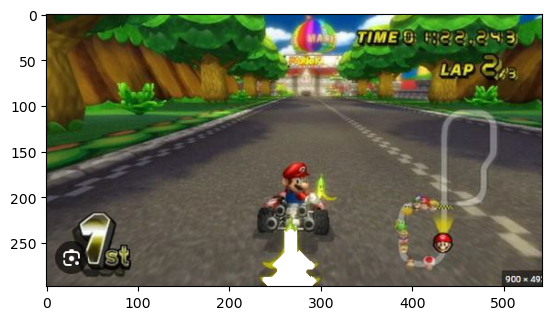

In [72]:
unique, counts = np.unique(comp_list, return_counts=True)
dictio=dict(zip(unique, counts))
cle_minimum = min(dictio, key=dictio.get)

original_image = original_image.convert("RGBA")
g=256
for y in range(height):
    for x in range(width):
        if comp_list[y * width + x] == cle_minimum:
            original_image.putpixel((y, x), (g, g, g))
plt.imshow(original_image)

            